<a href="https://colab.research.google.com/github/vinthegreat84/PFE-Lab/blob/main/decline_curve_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit - Yohanes Nuwara

In [ ]:
# Get DCA utility
!wget https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/dca/dca.py

--2022-09-28 08:46:59--  https://raw.githubusercontent.com/yohanesnuwara/pyreservoir/master/dca/dca.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7857 (7.7K) [text/plain]
Saving to: ‘dca.py’

dca.py              100%[===================>]   7.67K  --.-KB/s    in 0s      

2022-09-28 08:46:59 (78.6 MB/s) - ‘dca.py’ saved [7857/7857]



In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

from dca import remove_outlier, arps_fit

In [ ]:
# Production data link (same as session 2)
path = "http://bit.ly/piopetro-data1"

In [ ]:
# Read data
df = pd.read_csv(path)

In [ ]:
df.head()

DATEPRD NPD_WELL_BORE_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0  07-Apr-14         15/9-F-1 C            0.0                  0.000   
1  08-Apr-14         15/9-F-1 C            0.0                    NaN   
2  09-Apr-14         15/9-F-1 C            0.0                    NaN   
3  10-Apr-14         15/9-F-1 C            0.0                    NaN   
4  11-Apr-14         15/9-F-1 C            0.0                310.376   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                     0.000          0.000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                    96.876        277.278                0.0   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0           0.00000      0.000       0.00          0.000           0.0   
1           1.00306      0.000       0.00          0.000           0.0   
2           0.97901      0.000       0.00          0.000           0.0   
3           0.54576      0.000       0.00          0.000           0.0   
4           1.21599     33.098      10.48         33.072           0.0   

   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0          NaN  production  
1           0.0           0.0          NaN  production  
2           0.0           0.0          NaN  production  
3           0.0           0.0          NaN  production  
4           0.0           0.0          NaN  production

In [ ]:
df.tail()

DATEPRD NPD_WELL_BORE_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
15629  14-Sep-16           15/9-F-5            0.0                    NaN   
15630  15-Sep-16           15/9-F-5            0.0                    NaN   
15631  16-Sep-16           15/9-F-5            0.0                    NaN   
15632  17-Sep-16           15/9-F-5            0.0                    NaN   
15633  18-Sep-16           15/9-F-5            0.0                    NaN   

       AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
15629                       NaN            NaN              0.273   
15630                       NaN            NaN              0.287   
15631                       NaN            NaN              0.286   
15632                       NaN            NaN              0.272   
15633                       NaN            NaN                NaN   

       AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
15629           0.63609      0.078      0.229          0.019           0.0   
15630           0.67079      0.085      0.229          0.006           0.0   
15631           0.66439      0.085      0.229          0.012           0.0   
15632           0.62466      0.075      0.228          0.026           0.0   
15633               NaN        NaN        NaN          0.000           NaN   

       BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
15629           0.0           0.0          NaN  production  
15630           0.0           0.0          NaN  production  
15631           0.0           0.0          NaN  production  
15632           0.0           0.0          NaN  production  
15633           NaN           NaN          0.0   injection

In [ ]:
df.columns

Index(['DATEPRD', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL', 'BORE_WAT_VOL',
       'BORE_WI_VOL', 'FLOW_KIND'],
      dtype='object')

In [ ]:
df.NPD_WELL_BORE_NAME.unique()

array(['15/9-F-1 C', '15/9-F-11', '15/9-F-12', '15/9-F-14', '15/9-F-15 D',
       '15/9-F-4', '15/9-F-5'], dtype=object)

In [ ]:
# Convert date column to pandas datetime format
df["DATEPRD"] = pd.to_datetime(df["DATEPRD"], format="%d-%b-%y")

df.head()

DATEPRD NPD_WELL_BORE_NAME  ON_STREAM_HRS  AVG_DOWNHOLE_PRESSURE  \
0 2014-04-07         15/9-F-1 C            0.0                  0.000   
1 2014-04-08         15/9-F-1 C            0.0                    NaN   
2 2014-04-09         15/9-F-1 C            0.0                    NaN   
3 2014-04-10         15/9-F-1 C            0.0                    NaN   
4 2014-04-11         15/9-F-1 C            0.0                310.376   

   AVG_DOWNHOLE_TEMPERATURE  AVG_DP_TUBING  AVG_ANNULUS_PRESS  \
0                     0.000          0.000                0.0   
1                       NaN            NaN                0.0   
2                       NaN            NaN                0.0   
3                       NaN            NaN                0.0   
4                    96.876        277.278                0.0   

   AVG_CHOKE_SIZE_P  AVG_WHP_P  AVG_WHT_P  DP_CHOKE_SIZE  BORE_OIL_VOL  \
0           0.00000      0.000       0.00          0.000           0.0   
1           1.00306      0.000       0.00          0.000           0.0   
2           0.97901      0.000       0.00          0.000           0.0   
3           0.54576      0.000       0.00          0.000           0.0   
4           1.21599     33.098      10.48         33.072           0.0   

   BORE_GAS_VOL  BORE_WAT_VOL  BORE_WI_VOL   FLOW_KIND  
0           0.0           0.0          NaN  production  
1           0.0           0.0          NaN  production  
2           0.0           0.0          NaN  production  
3           0.0           0.0          NaN  production  
4           0.0           0.0          NaN  production

In [ ]:
# Select well 15/9-F-14 (Don't forget to reset index)
df = df[df["NPD_WELL_BORE_NAME"]=="15/9-F-14"].reset_index()

# Dataframe only has 2 columns of interest: time and rate
df = df[["DATEPRD", "BORE_OIL_VOL"]]

df.head()

DATEPRD  BORE_OIL_VOL
0 2008-02-12           0.0
1 2008-02-13           0.0
2 2008-02-14           0.0
3 2008-02-15           0.0
4 2008-02-16           0.0

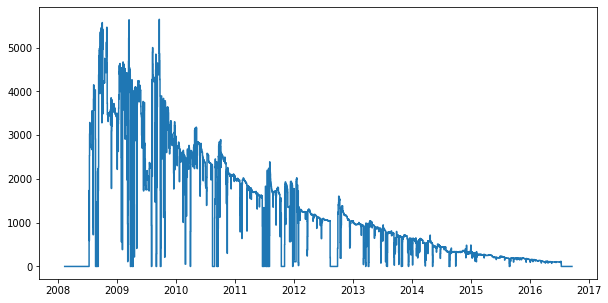

In [ ]:
# Plot oil production rate
plt.figure(figsize=(10,5))
plt.step(df["DATEPRD"], df["BORE_OIL_VOL"])
plt.show()

In [ ]:
# Removing outliers (window=150, num_stdev=50)
df2 = remove_outlier(df, "BORE_OIL_VOL", 50, 50, trim=True)

df2.head()

DATEPRD  BORE_OIL_VOL  BORE_OIL_VOL_rol_Av  BORE_OIL_VOL_rol_Std  \
0 2008-11-01        4645.0              4016.40            593.445732   
1 2008-11-02        3732.0              4009.00            593.123727   
2 2008-11-03        3476.0              4001.48            592.919798   
3 2008-11-04        3461.0              3953.06            670.047802   
4 2008-11-05        3458.0              3930.94            679.680219   

   BORE_OIL_VOL_is_Outlier  
0                    False  
1                    False  
2                    False  
3                    False  
4                    False

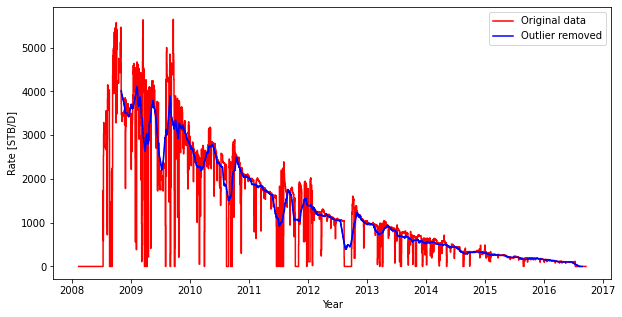

In [ ]:
# Plot outlier-removed oil production rate, compare w/ original
plt.figure(figsize=(10,5))

plt.step(df["DATEPRD"], df["BORE_OIL_VOL"], color="red", label="Original data")
plt.step(df2["DATEPRD"], df2["BORE_OIL_VOL_rol_Av"], color="blue", label="Outlier removed")
plt.xlabel("Year"); plt.ylabel("Rate [STB/D]")

plt.legend()
plt.show()

In [ ]:
# Define time and production rate (from outlier-removed dataframe)
t = df2["DATEPRD"]
q = df2["BORE_OIL_VOL_rol_Av"]

Initial production rate (qi)  : 3835.95682 VOL/D
Initial decline rate (di)     : 0.00080 VOL/D
Decline coefficient (b)       : -0.28729
RMSE of regression            : 0.00753


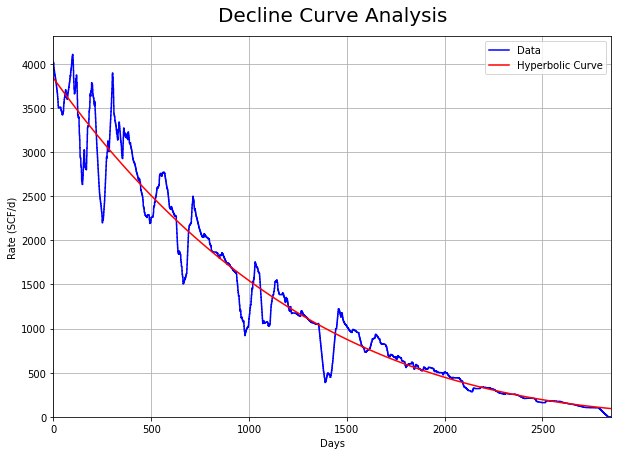

(3835.956818560814,
 0.0008015095854182389,
 -0.2872863626589032,
 0.007526803769319763)

In [ ]:
# Decline curve analysis
arps_fit(t, q, plot=True)